In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from sklearn.linear_model import LinearRegression 
from ISLP.models import summarize, poly 
from ISLP.models import ModelSpec as MS 
from ISLP import load_data 
%matplotlib inline


In [37]:
carseats = load_data("Carseats") 
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


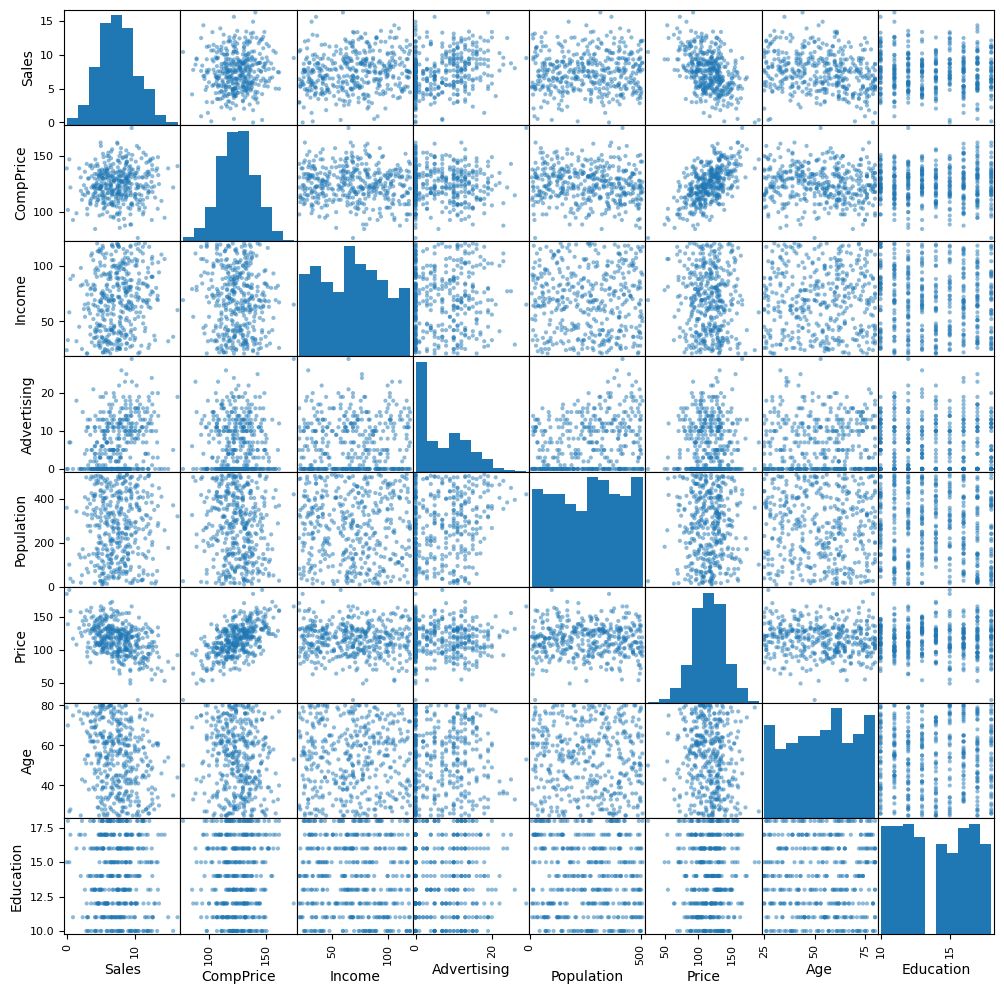

In [38]:
pd.plotting.scatter_matrix(carseats,figsize=(12,12));

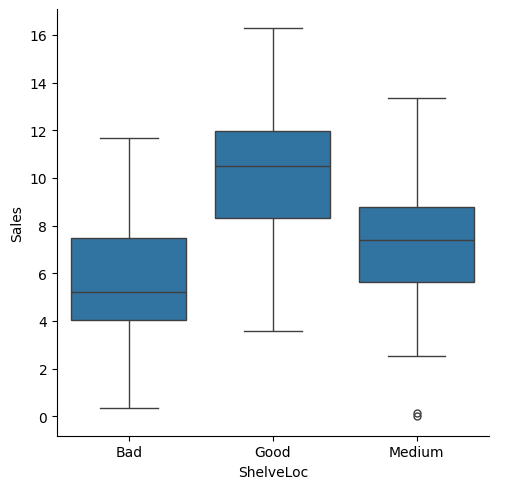

In [39]:
sns.catplot(data=carseats, x="ShelveLoc", y="Sales",kind="box"); 

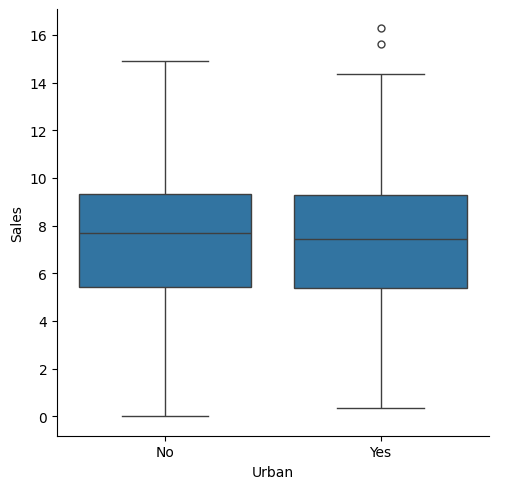

In [40]:
sns.catplot(data=carseats, x="Urban", y="Sales",kind="box"); 


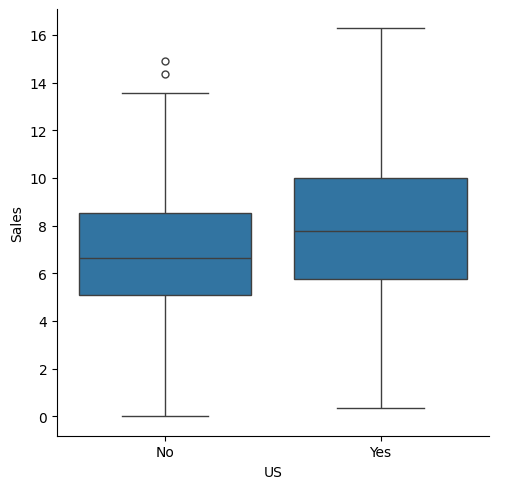

In [41]:
sns.catplot(data=carseats, x="US", y="Sales",kind="box"); 

In [42]:
y = carseats["Sales"] 
X = MS(["Price", "Advertising","Age","ShelveLoc","US"]).fit_transform(carseats) 
results = sm.OLS(y, X).fit() 
summarize(results)


,coef,std err,t,P>|t|
intercept,14.4695,0.517,27.961,0.000
Price,-0.0615,0.003,-18.192,0.000
Advertising,0.1090,0.016,6.647,0.000
Age,-0.0500,0.005,-10.129,0.000
ShelveLoc[Good],4.8171,0.237,20.337,0.000
ShelveLoc[Medium],1.9391,0.195,9.957,0.000
US[Yes],0.0067,0.228,0.029,0.977


In [43]:
# TODO: Part f

In [44]:
vals = [VIF(X, i) 
for i in range(1, X.shape[1])] 
vif = pd.DataFrame({"vif":vals}, 
index=X.columns[1:]) 
vif


,vif
Price,1.016643
Advertising,1.886831
Age,1.014642
ShelveLoc[Good],1.493917
ShelveLoc[Medium],1.495316
US[Yes],1.896184


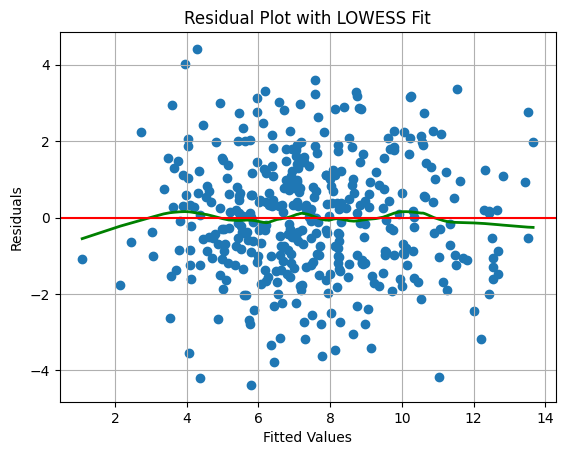

In [45]:
model = LinearRegression().fit(X, y) 
y_pred = model.predict(X) 
residuals = y - y_pred 
lowess = sm.nonparametric.lowess 
smoothed = lowess(residuals,y_pred, frac=0.3) 
plt.scatter(y_pred, residuals) 
plt.plot(smoothed[:, 0], smoothed[:, 1], color="green",label="LOWESS Fit", linewidth=2)
plt.axhline(y=0, color="r", linestyle="-") 
plt.xlabel("Fitted Values") 
plt.ylabel("Residuals") 
plt.title("Residual Plot with LOWESS Fit") 
plt.grid(True) 
plt.show()


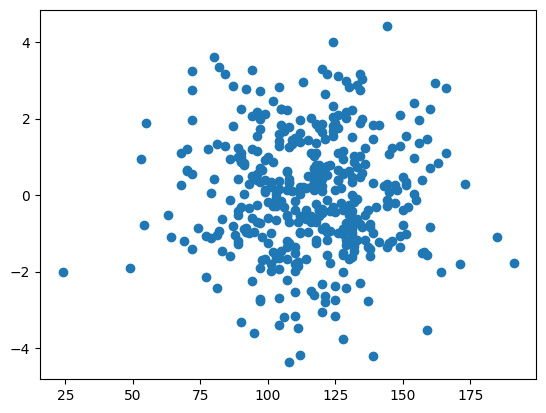

In [46]:
plt.scatter(X["Price"], residuals); 


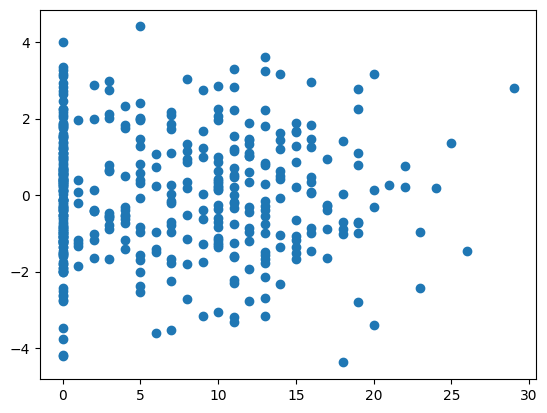

In [47]:
plt.scatter(X["Advertising"], residuals); 

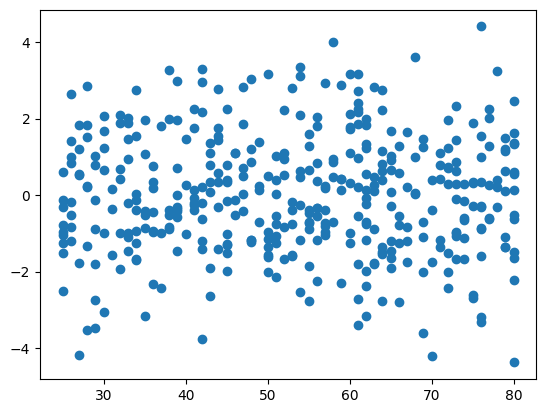

In [48]:
plt.scatter(X["Age"], residuals); 

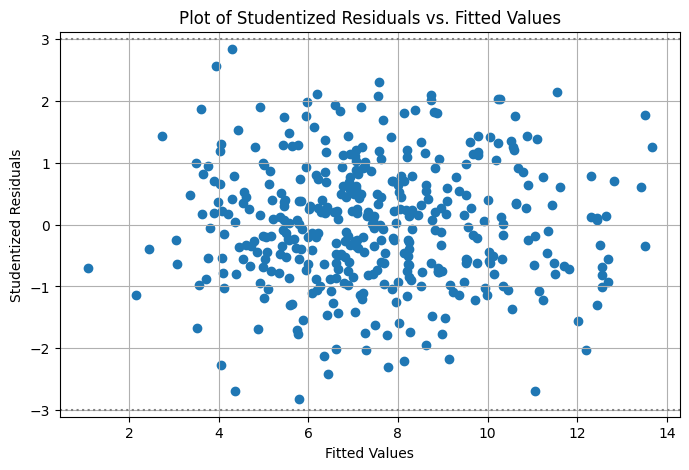

In [49]:
model = sm.OLS(y, X).fit() 
influence = model.get_influence() 
studentized_residuals = influence.resid_studentized_external 
fitted_values = model.fittedvalues 
plt.figure(figsize=(8, 5)) 
plt.scatter(fitted_values,studentized_residuals) 
plt.axhline(y=3, color="gray", linestyle=":") 
plt.axhline(y=-3, color="gray", linestyle=":") 
plt.xlabel("Fitted Values") 
plt.ylabel("Studentized Residuals") 
plt.title("Plot of Studentized Residuals vs. Fitted Values") 
plt.grid(True) 
plt.show()


In [50]:
h_avg = ((X.shape[1]+1)/X.shape[0]) 
infl= results2.get_influence() 
_, ax = plt.subplots(figsize=(8,8)) 
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, marker="o", facecolors="none", edgecolors="black", linewidths=0.5) 
ax.axhline(2*h_avg, ls="--", c="r", alpha=0.6) 
ax.set_xlabel("Index") 
ax.set_ylabel("Leverage");
df = pd.DataFrame(carseats) 
print(df[["Sales","Price","Advertising","Age"]].describe())
print(df["ShelveLoc"].value_counts())
leverage_count = sum(1 for number in infl.hat_matrix_diag if number > 2*h_avg)
np.argsort(infl.hat_matrix_diag)[-leverage_count:] 
carseats.iloc[np.argsort(infl.hat_matrix_diag)[-leverage_count:]]


NameError: name 'results2' is not defined